In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("S02-hw-dataset.csv")
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [17]:
data.isna().mean() * 100

user_id      0.000000
age          4.878049
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

In [23]:
only_duplicates = data[data.duplicated()]
only_duplicates

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [27]:
data[data["purchases"] < 0]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [37]:
data[(data["age"] > 100) | (data["age"] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [38]:
data[(data["purchases"] > 0) & (data["revenue"] <= 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [39]:
data[(data["purchases"] == 0) & (data["revenue"] > 0)]

,user_id,age,country,purchases,revenue


В датасете несколько логических ошибок. Пользователь с user_id = 6 имеет нереалистический возраст и отрицательное количество покупок, пользователь с user=if = 11 сделал 4 покупки, но доход от них равен 0.

In [45]:
data["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [46]:
data.groupby("country")[["age", "purchases", "revenue"]].mean()

,age,purchases,revenue
country,,,
CN,24.000000,4.500000,1054.000000
DE,34.600000,6.500000,1445.500000
FR,46.250000,4.250000,675.916667
RU,30.076923,4.769231,790.076923
US,36.714286,4.625000,557.375000


In [56]:
data["age_group"] = pd.cut(data["age"], bins=[0, 20, 40, 60, 80, 100, 120], labels=["0-20", "21-40", "41-60", "61-80", "81-100", "100-..."], right=True)
data["age_group"].value_counts()

age_group
21-40      23
41-60      12
0-20        3
100-...     1
61-80       0
81-100      0
Name: count, dtype: int64

Наибольшая средняя выручка наблюдается у пользователей из Германии - 1445,5. Немецкие пользователи также совершают больше всего покупок в среднем 6,5. Китай показывает высокую среднюю выручку 1054,0 при минимальном количестве пользователей.

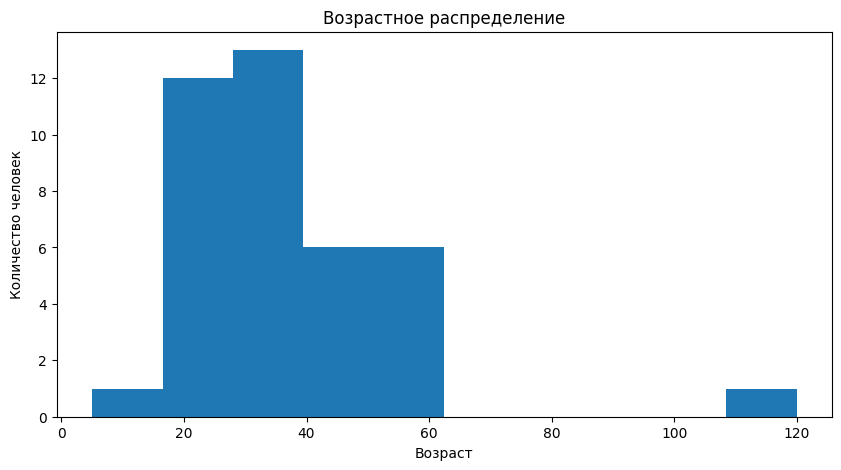

In [99]:
plt.figure(figsize=(10, 5))
plt.hist(data["age"].dropna(), bins=10)
plt.ylabel("Количество человек")
plt.xlabel("Возраст")
plt.title("Возрастное распределение")
plt.savefig("figure/histogram.png", dpi=500)
plt.show()

Гистограмма возрастного распределения показывает, что большинство пользователей сосредаточено в диапазоне от 20 до 40 лет.

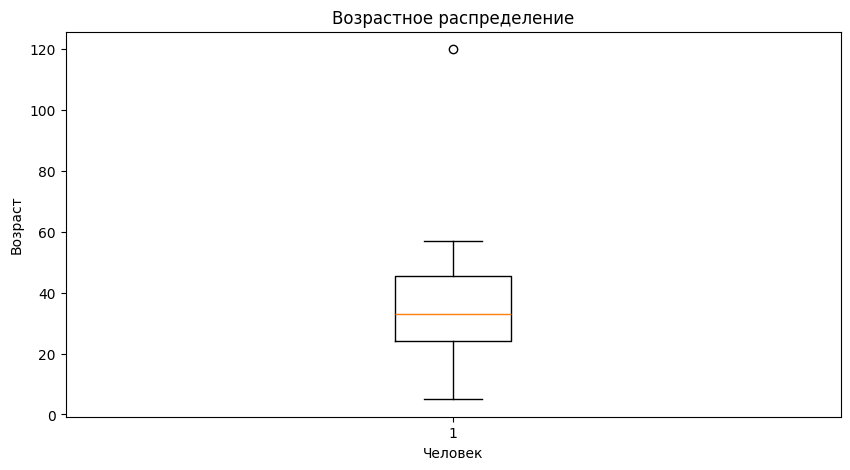

In [100]:
plt.figure(figsize=(10, 5))
plt.boxplot(data["age"].dropna())
plt.ylabel("Возраст")
plt.xlabel("Человек")
plt.title("Возрастное распределение")
plt.savefig("figure/boxplot.png", dpi=500)
plt.show()

Боксплот показывает медианный возраст, диапазон и выброс(120 лет).

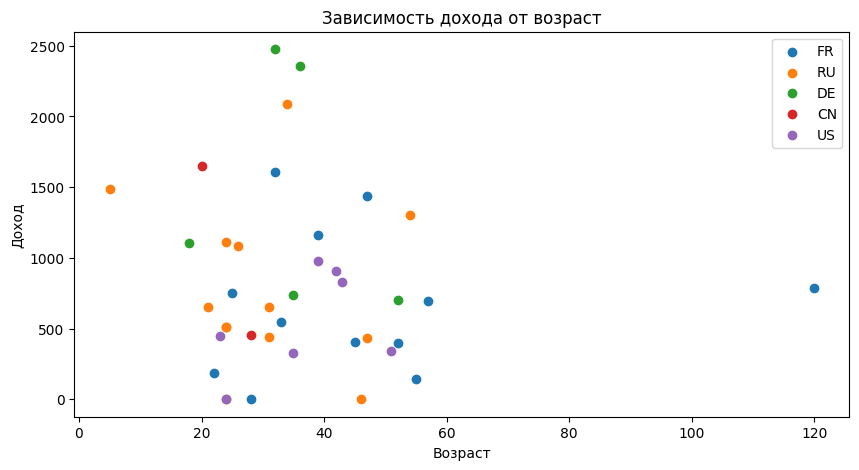

In [94]:
plt.figure(figsize=(10, 5))

for country in data["country"].unique():
    arr = data[data["country"] == country]
    plt.scatter(arr["age"], arr["revenue"], label=country)

plt.legend()
plt.ylabel("Доход")
plt.xlabel("Возраст")
plt.title("Зависимость дохода от возраст")
plt.show()

Диаграмма показывает, что с увеличением возраста наблюдается незначительный рост дохода, однако связь не является сильной.